In [2]:
import pandas as pd
import numpy as np
df = pd.read_csv('startup_funding.csv', encoding = 'utf-8')

df["InvestmentType"] = df["InvestmentType"].replace(["SeedFunding",'PrivateEquity', 'Crowd funding'], ["Seed Funding",'Private Equity', 'Crowd Funding'])

a = df['InvestorsName'].str.split(',')
df['StartupName'] = df['StartupName'].replace('Ola Cabs', 'Ola')
df['StartupName'] = df['StartupName'].replace('Olacabs', 'Ola')
df['StartupName'] = df['StartupName'].replace('Oyo Rooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('OyoRooms', 'Oyo')
#df['StartupName'] = df['StartupName'].replace('OYOfit', 'Oyo')
df['StartupName'] = df['StartupName'].replace('Oyorooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('OYO Rooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('Paytm Marketplace', 'Paytm')
df['StartupName'] = df['StartupName'].replace('Flipkart.com', 'Flipkart')
df['InvestorsName'].dropna(inplace = True)


ab = df[(df["InvestmentType"] == 'Seed Funding') | (df['InvestmentType']== 'Crowd Funding')]  

a = ab['StartupName']
b = ab['InvestorsName']

df2 = pd.DataFrame(a)
df2['InvestorsName'] = b

g = df2.groupby('StartupName')['InvestorsName'].apply(list).reset_index(name = 'InvestorsName')
a = g['InvestorsName']
arr = []
for i in a:
    for j in i:
        if type(j) == float:
            continue
        k = j.split(',')
        w = []
        for s in k:
            b = s.lstrip()
            w.append(b)
        we = np.array(w)
        u = np.unique(we)
        for f in u:
            arr.append(f)
        
df3 = pd.DataFrame(arr)
arr = []
for i in a:
    for j in i:
        if type(j) == float:
            continue
        k = j.split(',')
        w = []
        for s in k:
            b = s.lstrip()
            w.append(b)
        we = np.array(w)
        for f in we:
            arr.append(f)
        
df3 = pd.DataFrame(arr)
a = df3[0].value_counts()[:10]
b = a.index
c = a.values

    
array = ['Indian Angel Network', 'Rajan Anandan','LetsVenture','Anupam Mittal', 'Group of Angel Investors']
arr2 = [33,25,16,16, 15]


for i in range(len(array)):
    print(array[i], arr2[i])

Indian Angel Network 33
Rajan Anandan 25
LetsVenture 16
Anupam Mittal 16
Group of Angel Investors 15


Top 5 Investors  No. of Investment in Different Startup
0 Indian Angel Network 33
1 Rajan Anandan 23
2 LetsVenture 16
3 Anupam Mittal 16
4 Kunal Shah 14


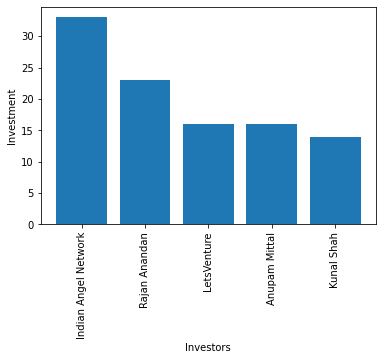

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('startup_funding.csv')
df = data.copy()
df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)


# Creating data frame consisting of only 2 columns "StartupName" and "InvestorsName"
# Dropping NA values

df = df[["StartupName","InvestorsName", 'InvestmentType']]
df.dropna(inplace=True)
ab = df[(df["InvestmentType"] == 'Seed Funding') | (df['InvestmentType']== 'Crowd Funding')]  


# Creating 2 list for StartupName and InvestorsName

startup_name=list(ab["StartupName"].values)
investor_name=list(ab["InvestorsName"].values)

# Traversing in the investor_name list , splitting by "," and applying the strip()
i=0
while i<len(investor_name):
    if ',' in investor_name[i] :
        l1 = investor_name[i].split(',')
        j = i 
        investor_name[j] = l1[0]
        j = j + 1
        for k in range(1,len(l1)): 
            investor_name.insert(j,l1[k].strip())
            startup_name.insert(j,startup_name[i])
            j = j + 1
        i = i + len(l1) - 1
    i = i + 1

# Creating a new list l2 and appending the investor name with their invested startup name 
# Creating list with only unique values by set() func.

l2 = []
for i in range(len(startup_name)):
    l2.append(investor_name[i]+"with"+startup_name[i])
l2 = list(set(l2))

# Creating a seperate list for the investor name 

l3 = []
for i in l2:
    i = i.split('with')
    l3.append(i[0].strip())

# Creating a new series with list of investor name 
# Value_counts().sort_values(ascending=False) gives the count of no. of fundings with their investor name
# Dropping the empty values and printing the top5 investors name with their fundings 

df_new = pd.Series(l3)
x = df_new.value_counts().sort_values(ascending=False)
x.drop("",inplace=True)
x = x[0:10]
df = pd.DataFrame(x.index,columns=["Top 5 Investors"])
df["No. of Investment in Different Startup"] = x.values




x1 = ['Indian Angel Network', 'Rajan Anandan', 'LetsVenture', 'Anupam Mittal', 'Kunal Shah']
y1 = [33, 23, 16, 16, 14]

print("Top 5 Investors  No. of Investment in Different Startup")
for i in range(len(y1)):
    print(i,x1[i],y1[i])

plt.bar(x1, y1)
plt.xticks(rotation = 90)
plt.xlabel('Investors')
plt.ylabel('Investment')
plt.show()
